C:\Users\jipyeong\AppData\Local\Temp\ipykernel_208\3320285174.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(subdirs))


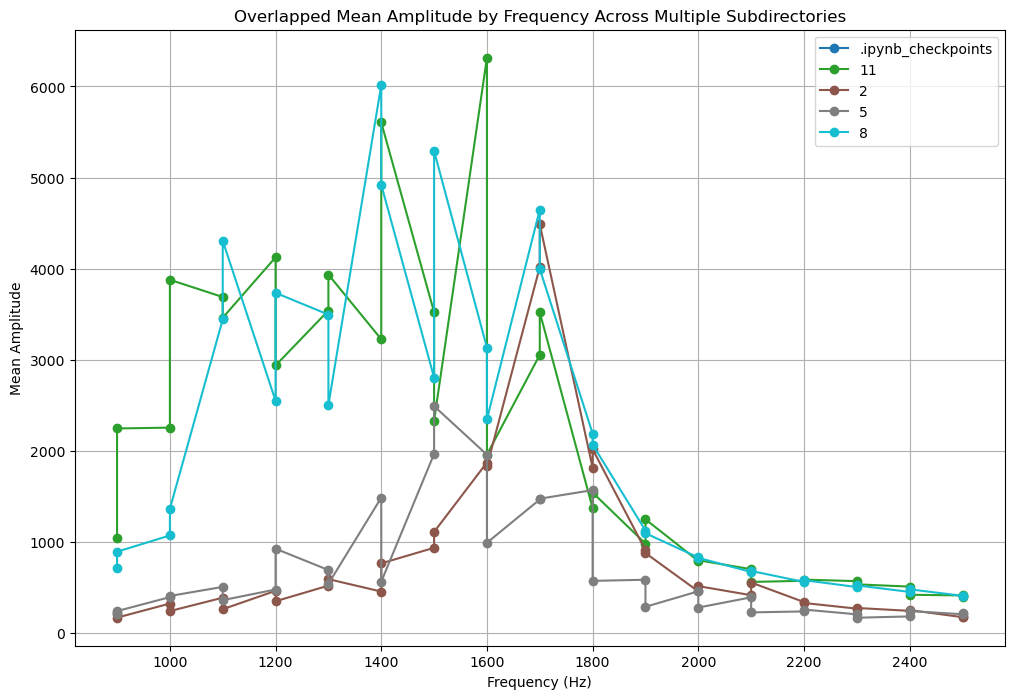

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 현재 디렉토리 설정
current_dir = os.getcwd()

# 현재 디렉토리 내의 모든 하위 디렉토리 탐색
subdirs = [os.path.join(current_dir, d) for d in os.listdir(current_dir) if os.path.isdir(os.path.join(current_dir, d))]

# 주파수 구간 설정
min_freq = 1600 - 700  # 최소 주파수
max_freq = 1600 + 1000  # 최대 주파수

# 플롯을 위한 색상 설정
colors = plt.cm.get_cmap('tab10', len(subdirs))

# 플롯 초기화
plt.figure(figsize=(12, 8))

# 각 하위 디렉토리에서 데이터를 처리하고 플롯
for i, subdir in enumerate(subdirs):
    frequency_means = {}
    
    # 각 하위 디렉토리에서 모든 .txt 파일 읽기
    file_paths = glob.glob(os.path.join(subdir, '*.txt'))
    
    for file_path in file_paths:
        # 데이터 파일에서 헤더를 건너뛰고 데이터를 로드
        data = pd.read_csv(file_path, skiprows=8, header=None)
        
        # 첫 번째 열은 시간, 두 번째 열은 진폭으로 가정
        time = data.iloc[:, 0]
        amplitude = data.iloc[:, 1]

        # FFT 수행
        n = len(amplitude)  # 데이터 포인트 수
        dt = time[1] - time[0]  # 시간 간격 (균일한 간격 가정)
        frequencies = np.fft.fftfreq(n, d=dt)
        fft_values = np.fft.fft(amplitude)

        # 양수 주파수와 해당하는 FFT 값만 유지
        positive_frequencies = frequencies[:n // 2]
        positive_fft_values = np.abs(fft_values[:n // 2])

        # 주파수 구간 필터링
        mask = (positive_frequencies >= min_freq) & (positive_frequencies <= max_freq)
        filtered_frequencies = positive_frequencies[mask]
        filtered_fft_values = positive_fft_values[mask]

        # 각 주파수에 대해 평균값 계산
        for freq, amp in zip(filtered_frequencies, filtered_fft_values):
            if freq not in frequency_means:
                frequency_means[freq] = []
            frequency_means[freq].append(amp)
    
    # 각 주파수에 대해 평균값을 계산
    mean_values = {freq: np.mean(amps) for freq, amps in frequency_means.items()}
    
    # 주파수 크기순으로 정렬
    sorted_frequencies = sorted(mean_values.keys())
    sorted_mean_values = [mean_values[freq] for freq in sorted_frequencies]
    
    # 하위 디렉토리 이름을 레이블로 사용하여 플롯
    label_name = os.path.basename(subdir)
    plt.plot(sorted_frequencies, sorted_mean_values, marker='o', linestyle='-', color=colors(i), label=label_name)

# 플롯 설정
plt.title("Overlapped Mean Amplitude by Frequency Across Multiple Subdirectories")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mean Amplitude")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\jipyeong\AppData\Local\Temp\ipykernel_13324\2818770166.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(subdirs))


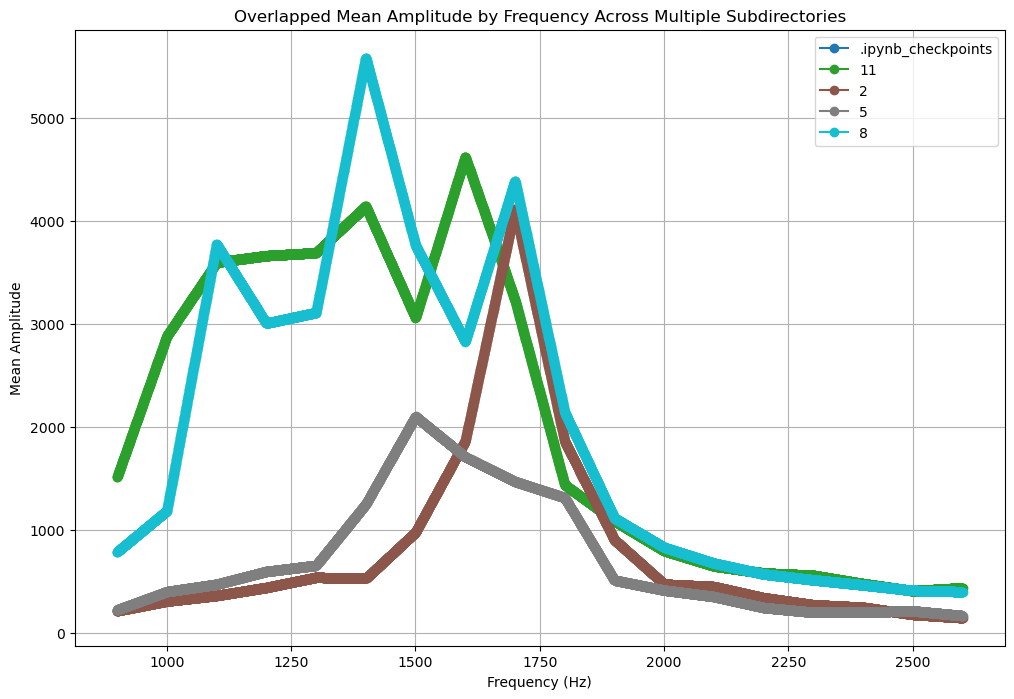

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 현재 디렉토리 설정
current_dir = os.getcwd()

# 현재 디렉토리 내의 모든 하위 디렉토리 탐색
subdirs = [os.path.join(current_dir, d) for d in os.listdir(current_dir) if os.path.isdir(os.path.join(current_dir, d))]

# 주파수 구간 설정
min_freq = 1600 - 700  # 최소 주파수
max_freq = 1600 + 1000  # 최대 주파수

# 플롯을 위한 색상 설정
colors = plt.cm.get_cmap('tab10', len(subdirs))

# 플롯 초기화
plt.figure(figsize=(12, 8))

# 각 하위 디렉토리에서 데이터를 처리하고 플롯
for i, subdir in enumerate(subdirs):
    frequency_means = {}
    
    # 각 하위 디렉토리에서 모든 .txt 파일 읽기
    file_paths = glob.glob(os.path.join(subdir, '*.txt'))
    
    for file_path in file_paths:
        # 데이터 파일에서 헤더를 건너뛰고 데이터를 로드
        data = pd.read_csv(file_path, skiprows=8, header=None)
        
        # 첫 번째 열은 시간, 두 번째 열은 진폭으로 가정
        time = data.iloc[:, 0]
        amplitude = data.iloc[:, 1]

        # FFT 수행
        n = len(amplitude)  # 데이터 포인트 수
        dt = time[1] - time[0]  # 시간 간격 (균일한 간격 가정)
        frequencies = np.fft.fftfreq(n, d=dt)
        fft_values = np.fft.fft(amplitude)

        # 양수 주파수와 해당하는 FFT 값만 유지
        positive_frequencies = frequencies[:n // 2]
        positive_fft_values = np.abs(fft_values[:n // 2])

        # 주파수 간격을 더 촘촘히 하기 위해 보간법 적용
        interpolated_freq = np.linspace(min_freq, max_freq, 5000)  # 5000 포인트로 촘촘히 나눔
        interpolated_amp = np.interp(interpolated_freq, positive_frequencies, positive_fft_values)

        # 주파수 구간 필터링
        mask = (interpolated_freq >= min_freq) & (interpolated_freq <= max_freq)
        filtered_frequencies = interpolated_freq[mask]
        filtered_fft_values = interpolated_amp[mask]

        # 각 주파수에 대해 평균값 계산
        for freq, amp in zip(filtered_frequencies, filtered_fft_values):
            if freq not in frequency_means:
                frequency_means[freq] = []
            frequency_means[freq].append(amp)
    
    # 각 주파수에 대해 평균값을 계산
    mean_values = {freq: np.mean(amps) for freq, amps in frequency_means.items()}
    
    # 주파수 크기순으로 정렬
    sorted_frequencies = sorted(mean_values.keys())
    sorted_mean_values = [mean_values[freq] for freq in sorted_frequencies]
    
    # 하위 디렉토리 이름을 레이블로 사용하여 플롯
    label_name = os.path.basename(subdir)
    plt.plot(sorted_frequencies, sorted_mean_values, marker='o', linestyle='-', color=colors(i), label=label_name)

# 플롯 설정
plt.title("Overlapped Mean Amplitude by Frequency Across Multiple Subdirectories")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mean Amplitude")
plt.grid(True)
plt.legend()
plt.show()
